In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [229]:
def calcularDistribuicaoFrequencia(valores):
    # Contando as frequências por valor:
    distFreqAbs = defaultdict(int)
    distFreqRel = defaultdict(int)
    total = 0
    for valor in valores:
        distFreqAbs[valor] += 1
        total += 1
    
    # Transformando em frequência relativa:
    for key in distFreqAbs.keys():
        distFreqRel[key] = distFreqAbs[key]/total

    return (distFreqAbs, distFreqRel)

In [230]:
questionario = pd.read_csv("../data/respostas.csv")
naoRespondeu = "-"

# 8a

defaultdict(<class 'int'>, {'1': 42, '0': 19, '2': 16, '3': 5, '4 ou mais': 9})


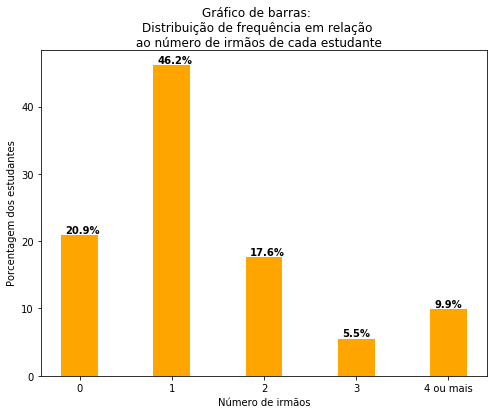

Proporção de famílias que tem 3 ou mais irmãos: 5.4945054945054945% + 9.89010989010989% = 15.384615384615385%


In [242]:
colunaIrmaos = questionario["irmãos"]
freqIrmaosAbs, freqIrmaosRel = calcularDistribuicaoFrequencia(colunaIrmaos)
numValores = len(freqIrmaosRel.keys())
numIrmaos = sorted(freqIrmaosRel.keys())
valoresY = [freqIrmaosRel[key]*100 for key in numIrmaos]
print(freqIrmaosAbs)

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle("Gráfico de barras:\nDistribuição de frequência em relação\n ao número de irmãos de cada estudante")
ax.set_xlabel("Número de irmãos")
ax.set_ylabel("Porcentagem dos estudantes")

plt.bar(range(numValores), valoresY, color="orange", width = 0.4, tick_label= numIrmaos)

for index, valor in enumerate(valoresY):
    ax.text(index-0.15, valor+0.35, str(round(valor,1))+"%", color="black", fontweight='bold')

plt.show()

resposta = freqIrmaosRel['3']+freqIrmaosRel["4 ou mais"]
print(f"Proporção de famílias que tem 3 ou mais irmãos: {freqIrmaosRel['3']*100}% + {freqIrmaosRel['4 ou mais']*100}% = {resposta*100}%")


# 8b

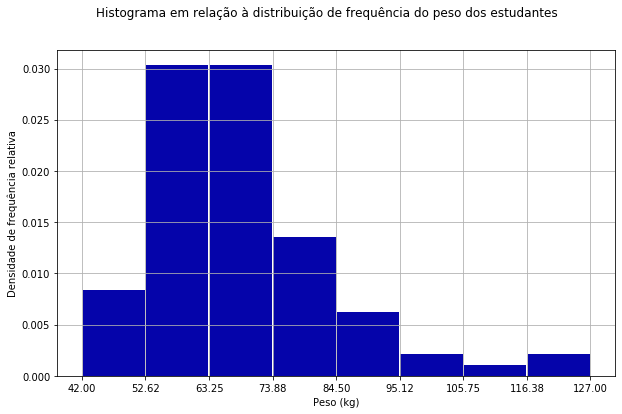

In [216]:
pesos = []
for peso in questionario["peso"]:
    if peso != naoRespondeu:
        pesos.append(int(peso))
pesoMaximo = max(pesos)
pesoMinimo = min(pesos)

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle("Histograma em relação à distribuição de frequência do peso dos estudantes")
ax.set_xlabel("Peso (kg)")
ax.set_ylabel("Densidade de frequência relativa")
densidades, classes, _ = ax.hist(pesos, bins=8, color="#0504aa",density=True,rwidth=0.98)
tamClasse = (pesoMaximo-pesoMinimo)/8
plt.xticks(np.arange(min(pesos),max(pesos)+1,tamClasse))
ax.grid()

# Cálculo da porcentagem de cada classe de frequência:
#n = len(classes)
#porcentagens = []
#for i in range(1,n):
#    porcentagens.append(100*densidades[i-1]*(classes[i]-classes[i-1]))

plt.show()


# 8c

In [217]:
indiceHomens = questionario.loc[questionario["sexo"] == "masculino"]["ID"]
indiceMulheres = questionario.loc[questionario["sexo"] == "feminino"]["ID"]

pesoHomens = []
pesoMulheres = []

for ind in indiceHomens:
    peso = questionario.at[ind-1,"peso"]
    if peso != naoRespondeu:
        pesoHomens.append(int(peso))

for ind in indiceMulheres:
    peso = questionario.at[ind-1,"peso"]
    if peso != naoRespondeu:
        pesoMulheres.append(int(peso))

pesoHomensOrd = sorted(pesoHomens)
pesoMulheresOrd = sorted(pesoMulheres)

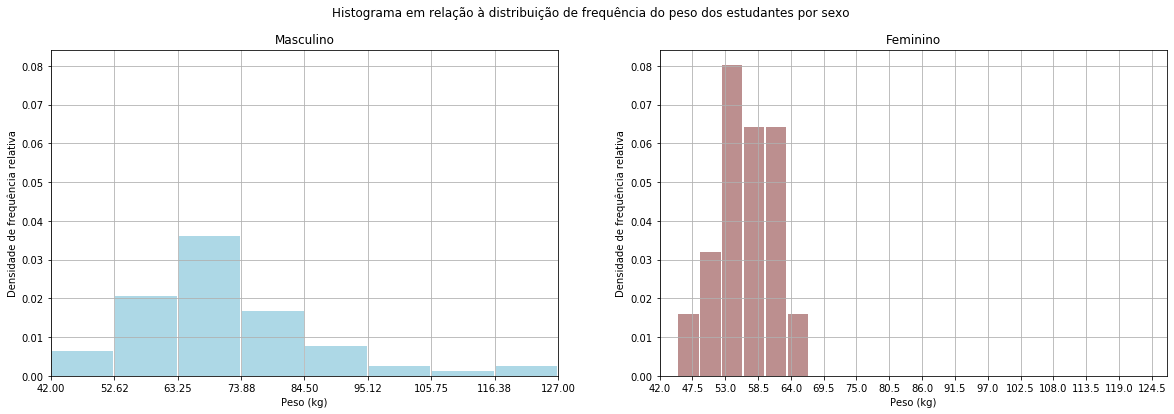

In [250]:
fig, (axH, axM) = plt.subplots(1,2,figsize=(20,6),sharey=True)
fig.suptitle("Histograma em relação à distribuição de frequência do peso dos estudantes por sexo")
pesoMinimo = min(pesoHomensOrd[0],pesoMulheresOrd[0])
pesoMaximo = max(pesoHomensOrd[-1],pesoMulheresOrd[-1])

# Homens:
axH.set_title("Masculino")
axH.set_xlabel("Peso (kg)")
axH.set_ylabel("Densidade de frequência relativa")
axH.set_xlim(pesoMinimo,pesoMaximo)
densidadesH, classesH, _ = axH.hist(pesoHomensOrd,bins=8, color="lightblue",density=True,rwidth=0.97)
tamClasse = (pesoHomensOrd[-1]-pesoHomensOrd[0])/8
axH.set_xticks(np.arange(pesoMinimo,pesoMaximo+tamClasse,tamClasse))
axH.grid()

# Mulheres:
axM.set_title("Feminino")
axM.set_xlabel("Peso (kg)")
axM.set_ylabel("Densidade de frequência relativa")
axM.set_xlim(pesoMinimo,pesoMaximo)
densidadesM, classesM, _ = axM.hist(pesoMulheresOrd,bins=8, color="rosybrown",density=True,rwidth=0.94)
tamClasse = (pesoMulheresOrd[-1]-pesoMulheresOrd[0])/8
axM.set_xticks(np.arange(pesoMinimo,pesoMaximo+1,2*tamClasse))
axM.grid()
axM.yaxis.set_tick_params(labelbottom=True)

plt.show()

# Cálculo da porcentagem de cada classe de frequência:
#n = len(classes)
#porcentagens = []
#for i in range(1,n):
#    porcentagens.append(100*densidades[i-1]*(classes[i]-classes[i-1]))

/home/mateus/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


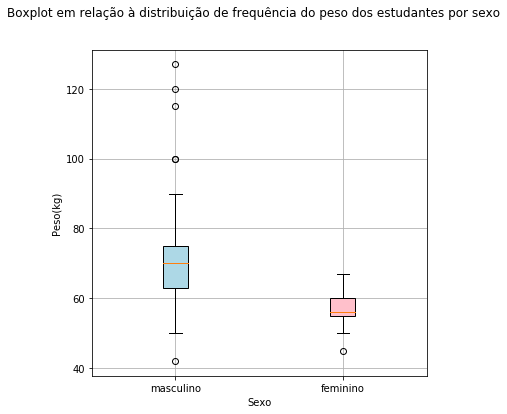

In [219]:
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("Boxplot em relação à distribuição de frequência do peso dos estudantes por sexo")
ax.set_ylabel("Peso(kg)") 
ax.set_xlabel("Sexo")
rotulos = ["masculino","feminino"]
bplot = ax.boxplot([pesoHomens,pesoMulheres],vert=True,patch_artist=True,labels=rotulos,showfliers=True)
ax.grid()

# Colorindo:
colors = ["lightblue","pink"]
for patch, color in zip(bplot["boxes"],colors):
    patch.set_facecolor(color)

plt.show()

# 8d

In [220]:
altura = questionario["altura"]
altura = list(altura) 
pesos = list(pesos)
del(altura[28]) # deletando observação, pois seu peso não foi especificado e impossibilita sua inclusão no gráfico.


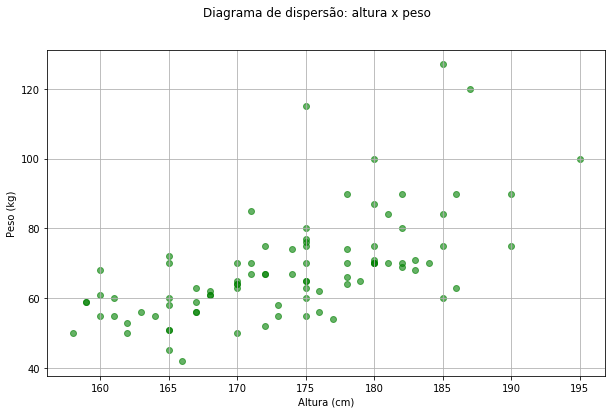

In [244]:
fig, ax = plt.subplots(figsize=(10,6))

fig.suptitle("Diagrama de dispersão: altura x peso")
ax.set_xlabel("Altura (cm)")
ax.set_ylabel("Peso (kg)")
ax.set_yscale
ax.scatter(altura,pesos,color="green",alpha=0.6)#marker="x")
ax.grid()
plt.show()

# 8e

In [222]:
pandemiaPesoHomens = []
pandemiaPesoMulheres = []

for ind in indiceHomens:
    peso = questionario.at[ind-1,"pandemia-peso"]
    if peso != naoRespondeu:
        pandemiaPesoHomens.append(int(peso))

for ind in indiceMulheres:
    peso = questionario.at[ind-1,"pandemia-peso"]
    if peso != naoRespondeu:
        pandemiaPesoMulheres.append(int(peso))

In [223]:
freqPandPesoH = calcularDistribuicaoFrequencia(pandemiaPesoHomens)
freqPandPesoM = calcularDistribuicaoFrequencia(pandemiaPesoMulheres)

pandemiaPeso_sexo = pd.crosstab(questionario["pandemia-peso"], questionario["sexo"], margins=False) 
pandemiaPeso_sexo = pandemiaPeso_sexo.iloc[1:,:]
freqTotal = []

# Iterando sobre as linhas do dataframe:
for ind, linha in pandemiaPeso_sexo.iterrows():
    total = int(linha["feminino"]) + int(linha["masculino"])
    freqTotal.append(total)

# Adicionando total por peso:
pandemiaPeso_sexo["total"] = freqTotal

# Adicionando total por sexo e total geral:
totalGeralLista = []

for col in pandemiaPeso_sexo:
    totalCol = 0
    for elem in pandemiaPeso_sexo[col]:
        totalCol += int(elem)
    totalGeralLista.append(totalCol)

totalGeral = pd.DataFrame({"feminino": [totalGeralLista[0]],
                           "masculino":[totalGeralLista[1]],
                           "total":[totalGeralLista[2]]})


pandemiaPeso_sexo = pd.concat([pandemiaPeso_sexo,totalGeral])
pandemiaPeso_sexo

sexo,feminino,masculino,total
1,1,1,2
2,5,10,15
3,8,37,45
4,3,18,21
5,0,7,7
0,17,73,90
